# DFT (Discrete Fourier Transform) of 1D signal

# DFT of 2D signal/ an image

In [1]:
import numpy as np

x=np.array([1,2,8,9])
x


array([1, 2, 8, 9])

In [2]:
dftx=np.fft.fft(x)
dftx

array([20.+0.j, -7.+7.j, -2.+0.j, -7.-7.j])

In [3]:
mag_dftx=np.abs(dftx)
mag_dftx

array([20.        ,  9.89949494,  2.        ,  9.89949494])

In [4]:
phase_dftx=np.angle(dftx)
phase_dftx

array([ 0.        ,  2.35619449,  3.14159265, -2.35619449])

# inverse DFT:

In [5]:
back=np.fft.ifft(dftx)
back

array([1.+0.j, 2.+0.j, 8.+0.j, 9.+0.j])

# find the dDFT of this 2D array:

x1=[1 1 1 1;1 1 1 1; 1 1 1 1;1 1 1 ] x2= [2 0 0 0; 0 0 0 0; 0 0 0 0; 0 0 0 0]

In [6]:
x1=np.ones([4,4])
dftx1=np.fft.fft2(x1)
dftx1

array([[16.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j]])

In [7]:
import numpy as np
b = 4 * np.eye(4)
print(b)
print(np.fft.fft2(b))


[[4. 0. 0. 0.]
 [0. 4. 0. 0.]
 [0. 0. 4. 0.]
 [0. 0. 0. 4.]]
[[16.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j 16.+0.j]
 [ 0.+0.j  0.+0.j 16.+0.j  0.+0.j]
 [ 0.+0.j 16.+0.j  0.+0.j  0.+0.j]]


# DFT of an image:

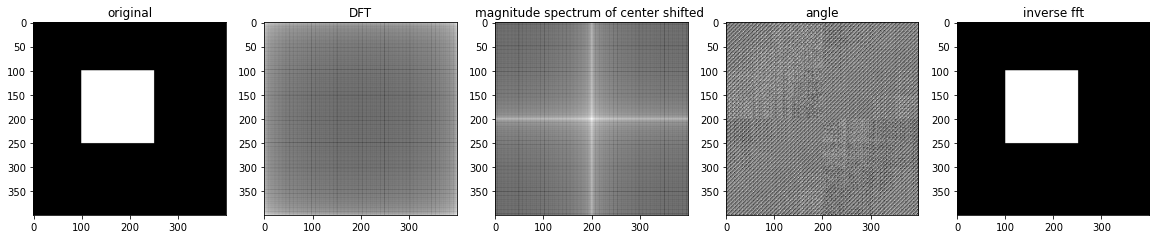

In [8]:
import cv2
import matplotlib.pyplot as plt

#Acquire Image
#image1=cv2.imread('roi.jpg',0)


image1 = np.zeros((400, 400), dtype="uint8")
cv2.rectangle(image1, (100, 100), (250, 250), 255, -1)
#image1[1:2:100,1:50]=1


dftim=np.fft.fft2(image1)
dftims=np.fft.fftshift(dftim)
magim=np.abs(dftims)
angim=np.angle(dftims)

back=np.fft.ifft2(dftims)
back=np.abs(back)

plt.figure(figsize=(20,10))

plt.subplot(151), plt.imshow(image1, 'gray'), plt.title('original')
plt.subplot(152), plt.imshow(np.log(np.abs(dftim)), 'gray'), plt.title('DFT')


#plt.subplot(153), plt.imshow(np.log(np.abs(dftims)), 'gray'), plt.title('shifted spectrum')

plt.subplot(153), plt.imshow(np.log(magim), 'gray'), plt.title('magnitude spectrum of center shifted ')
plt.subplot(154), plt.imshow(angim, 'gray'), plt.title('angle')
plt.subplot(155), plt.imshow(back, 'gray'), plt.title('inverse fft')

plt.show()

# Fourier Transform in OpenCV:

In [35]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('tree.jpg',0)
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


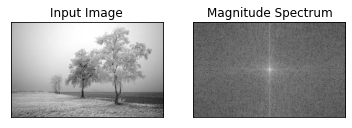

In [36]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [42]:
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

In [43]:
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])


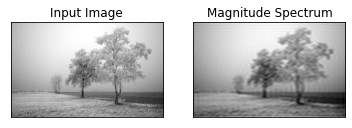

In [44]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
blur image at 